In [119]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [4]:
train=pd.read_csv(r'C:\Users\kvish\Downloads\train_E6oV3lV.csv')

test=pd.read_csv(r'C:\Users\kvish\Downloads\test_tweets_anuFYb8.csv')


print(train.shape)

print(test.shape)

(31962, 3)
(17197, 2)


In [6]:

train["label"].value_counts()



0    29720
1     2242
Name: label, dtype: int64

In [11]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
"""
Here we have imbalanced data set we should choose the performance metrics carefully
we can use f1 score as performance metric
"""

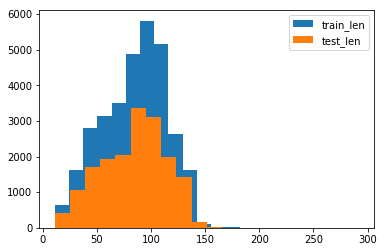

In [8]:
#Here we check the distribution of length of tweets in both train and test data

train_length=train['tweet'].str.len()

test_length=test['tweet'].str.len()


plt.hist(train_length,bins=20,label='train_len')
plt.hist(test_length,bins=20,label='test_len')
plt.legend()
plt.show()

In [9]:
#preprocessing
#we combine the train and test for preprocessing 
#In test data we don't have label column and the values for test data in combined data set will NaNs
combined=train.append(test,ignore_index=True)
print(combined.shape)

(49159, 3)


In [16]:
combined.tail()
#As you can see here Label is NAN for test data

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [42]:
"""we should get rid of the punctuations, numbers and even special characters
since they wouldn’t help in differentiating different types of tweets.
We will remove the twitter handles as they are already masked as @user due to privacy concerns and
they don't give any info about nature of the tweet
Most of the smaller words do not add much value.
For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data
Finally we do lemmatise them to bring the words to their root word that will make sense to understand 
"""



def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [43]:
combined["clean_tw"]=np.vectorize(remove_pattern)(combined['tweet'],"@[\w]*")

In [44]:
combined.head()

,id,label,tweet,clean_tw
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [46]:
#Removing Punctuations, Numbers, and Special Characters

combined['clean_tw'] = combined['clean_tw'].str.replace("[^a-zA-Z#]", " ") 
combined.head(10)

,id,label,tweet,clean_tw
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [48]:
#We have to be a little careful here in selecting the length of the words which we want to remove.
#So, I have decided to remove all the words having length 3 or less.
#For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them


combined['clean_tw'] = combined['clean_tw'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [49]:
#we tokenize and apply stemmer

token_tw=combined['clean_tw'].apply(lambda x:x.split())

In [50]:
token_tw.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tw, dtype: object

In [51]:
from nltk.stem.porter import PorterStemmer
stemer=PorterStemmer()

token_tw=token_tw.apply(lambda x:[stemer.stem(i) for i in x])

In [52]:
token_tw.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tw, dtype: object

In [60]:
tok=token_tw.apply(lambda x: ' '.join(x))

In [64]:
combined["clean_tw"]=tok

In [65]:
combined.head()

,id,label,tweet,clean_tw
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


0        when father dysfunct selfish drag kid into dys...
1        thank #lyft credit caus they offer wheelchair ...
2                                      bihday your majesti
3                               #model love take with time
4                                 factsguid societi #motiv
5        huge fare talk befor they leav chao disput whe...
6                                      camp tomorrow danni
7        next school year year exam think about that #s...
8        love land #allin #cav #champion #cleveland #cl...
9                                              welcom here
10       #ireland consum price index climb from previou...
11       selfish #orlando #standwithorlando #pulseshoot...
12                               daddi today day #gettingf
13       #cnn call #michigan middl school build wall ch...
14       comment #australia #opkillingbay #seashepherd ...
15            ouch junior angri #got #junior #yugyoem #omg
16                          thank have paner #thank #pos

In [68]:
all_words=" ".join(text for text in combined['clean_tw'] )

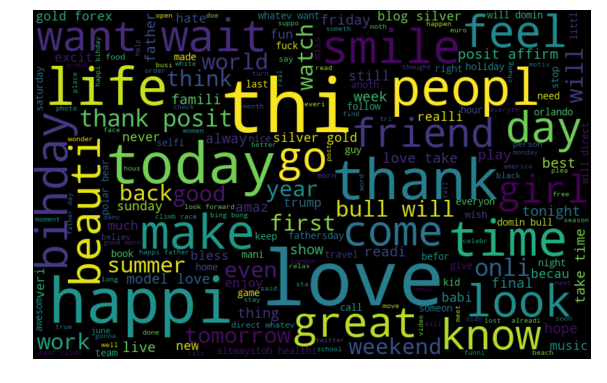

In [75]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

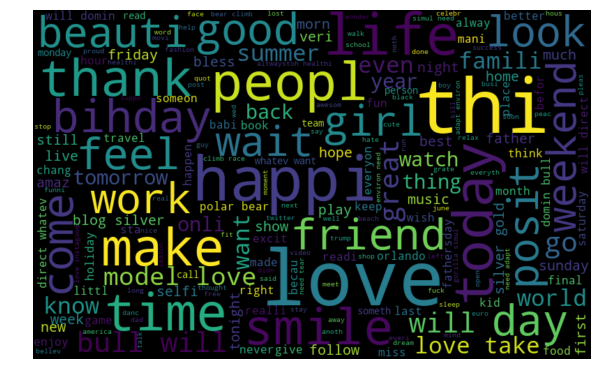

In [81]:
postive_words=''.join([text for text in combined['clean_tw'][combined['label']==0]])
#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(postive_words) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(postive_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

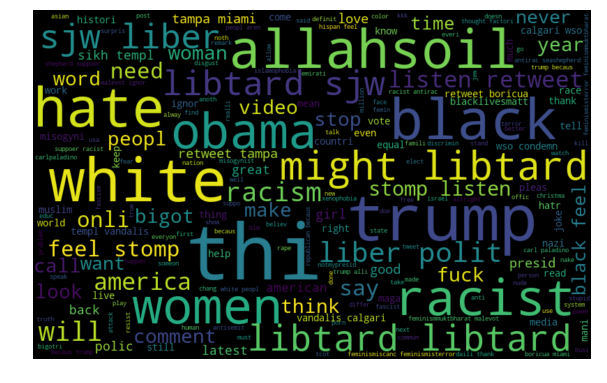

In [80]:
negative_words = ' '.join([text for text in combined['clean_tw'][combined['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [ ]:
#Hashtag have a seperate meaning in tweets which can refer direct meaning to tweets 
#we try to seperate both postive and negative hash tags so that can be for further analysis

def hashtag_extract(x,pat):
    hashtag=[]
    for i in 

In [104]:
positive_hashtag=combined.clean_tw[combined['label']==0].apply(lambda x: re.findall(r"#(\w+)", x) )

In [106]:
negative_hashtag=combined.clean_tw[combined['label']==1].apply(lambda x: re.findall(r"#(\w+)", x) )

In [89]:
# function to collect hashtags
def hashtag_extract(x):   
    hashtags = []    
    # Loop over the words in the tweet  
    for i in x:      
        ht = re.findall(r"#(\w+)", i)    
        hashtags.append(ht)     
    return hashtags

In [91]:
HT_regular = hashtag_extract(combined['clean_tw'][combined['label'] == 0]) 

In [113]:
HT_negative=hashtag_extract(combined['clean_tw'][combined['label'] == 1])

In [122]:
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

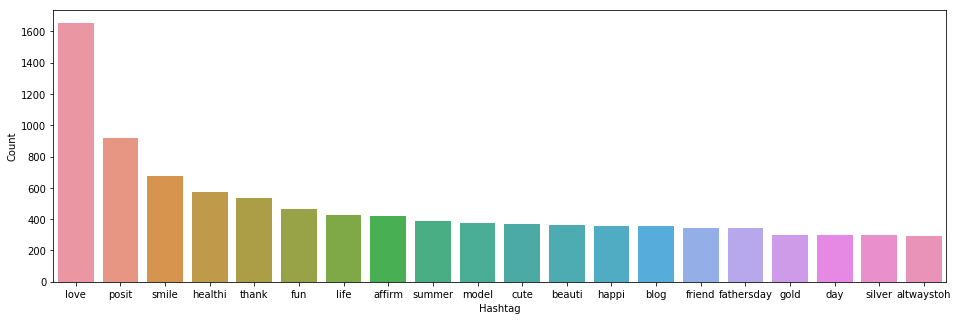

In [125]:
#Non-Racist/Sexist Tweets

a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags    
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

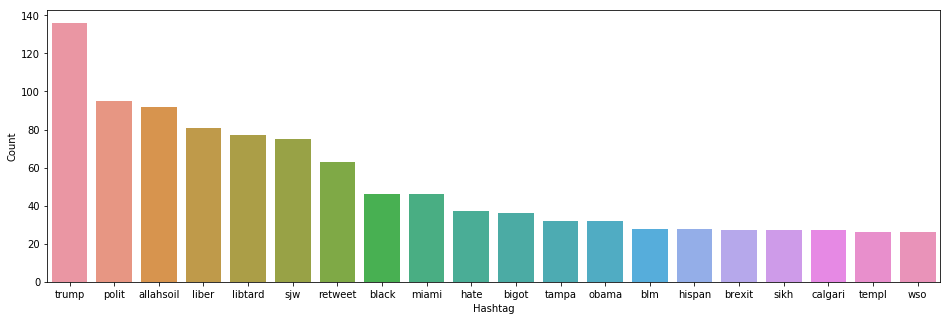

In [128]:
#Racist/Sexist Tweets

a = nltk.FreqDist(HT_negative) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags    
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

In [134]:
#Now we build bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim

bag_vect=CountVectorizer(max_df=0.9,min_df=2,stop_words='english',max_features=1000)


In [135]:
bow=bag_vect.fit_transform(combined["clean_tw"])
print(bow.shape)

In [139]:
tf_vect=TfidfVectorizer(max_df=0.9,min_df=2,stop_words='english',max_features=1000)
tf_idf=tf_vect.fit_transform(combined["clean_tw"])

In [140]:
print(tf_idf.shape)

(49159, 1000)


In [141]:
tokenized_tweet = combined['clean_tw'].apply(lambda x: x.split()) 

In [148]:
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 


In [149]:
model_w2v.train(tokenized_tweet, total_examples= len(combined['clean_tw']), epochs=20)

(6510028, 7536020)

In [150]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.5683194398880005),
 ('#avocado', 0.5676097869873047),
 ('#biall', 0.5547013282775879),
 ('#cellar', 0.5487853288650513),
 ('spinach', 0.5460838079452515),
 ('#foodcoma', 0.5430184602737427),
 ('cookout', 0.5425418615341187),
 ('melani', 0.5412483215332031),
 ('gown', 0.5391215085983276),
 ('noodl', 0.5377457141876221)]

In [151]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.556797981262207),
 ('phoni', 0.539929211139679),
 ('melo', 0.5375704169273376),
 ('hillari', 0.5375649929046631),
 ('#delegaterevolt', 0.528427004814148),
 ('unfit', 0.523555338382721),
 ('unstabl', 0.5220476388931274),
 ('tomlin', 0.5215546488761902),
 ('endors', 0.5180415511131287),
 ('potu', 0.5125478506088257)]

In [158]:
#Logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split




In [159]:
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 

xtrain,xvalid,y_train,y_valid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

In [162]:
lreg=LogisticRegression()
#we use bagofwords 
lreg.fit(xtrain,y_train)
prediction = lreg.predict_proba(xvalid)

In [164]:
prediction_int=prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int) 
f1_score(y_valid, prediction_int) 

0.5307820299500832

In [165]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int

In [170]:
#here we use tfidf
train_tfidf = tf_idf[:31962,:]
test_tfidf = tf_idf[31962:,:] 
xtrain_tfidf = train_tfidf[y_train.index] 
xvalid_tfidf = train_tfidf[y_valid.index]
lreg.fit(xtrain_tfidf, y_train) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_valid, prediction_int)
# calculating f1 score for the validation set

0.5446507515473032

In [172]:
#SVM Model
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain, y_train) 
prediction = svc.predict_proba(xvalid) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_valid, prediction_int)

0.5097674418604652

In [173]:
test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 


In [175]:
#tf-idf

svc = svm.SVC(kernel='linear', 
C=1, probability=True).fit(xtrain_tfidf, y_train) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_valid, prediction_int)

0.5104831358249772

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain, y_train) 
prediction = rf.predict(xvalid) 
# validation score 
f1_score(y_valid, prediction)

In [ ]:
print(f1_score(y_valid, prediction))

In [180]:
#TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, y_train) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(y_valid, prediction)

0.562152133580705

In [184]:
#Xgboost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain, y_train) 
prediction = xgb_model.predict(xvalid) 
f1_score(y_valid, prediction)

0.5130687318489837

In [186]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, y_train) 
prediction = xgb.predict(xvalid_tfidf)
f1_score(y_valid, prediction)

0.5185891325071497